# 문제정의
- 비만을 판단하는 모델을 만들기
- 분류문제로 접근

# 데이터 수집
- csv파일로 데이터 수집
- 500명에 대한 키, 몸무게, 성별, 비만도 데이터

In [1]:
import pandas as pd
bmi=pd.read_csv('./data/bmi_500.csv')
bmi.head()

,Gender,Height,Weight,Label
0,Male,174,96,Obesity
1,Male,189,87,Normal
2,Female,185,110,Obesity
3,Female,195,104,Overweight
4,Male,149,61,Overweight


# 데이터 전처리
- 결측치 확인
- 이상치 확인

## 결측치 확인
- info()

In [2]:
bmi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Gender  500 non-null    object
 1   Height  500 non-null    int64 
 2   Weight  500 non-null    int64 
 3   Label   500 non-null    object
dtypes: int64(2), object(2)
memory usage: 15.8+ KB


## 이상치 확인
- describe()
- 수치형 데이터에서만 확인 가능

In [3]:
bmi.describe()

,Height,Weight
count,500.000000,500.000000
mean,169.944000,106.000000
std,16.375261,32.382607
min,140.000000,50.000000
25%,156.000000,80.000000
50%,170.500000,106.000000
75%,184.000000,136.000000
max,199.000000,160.000000


# 탐색적 데이터 분석
- 시각화를 통해서 원하는 정보를 한눈에 알아보기
- 비만도별로 데이터가 잘 나누어져있는지 확인

## 비만도 등급확인

In [6]:
bmi['Label'].unique()

array(['Obesity', 'Normal', 'Overweight', 'Extreme Obesity', 'Weak',
       'Extremely Weak'], dtype=object)

##  Weak인 사람들을 그래프로 확인해보기

In [8]:
scatter_data=bmi[bmi['Label']=='Weak']

In [9]:
import matplotlib.pyplot as plt

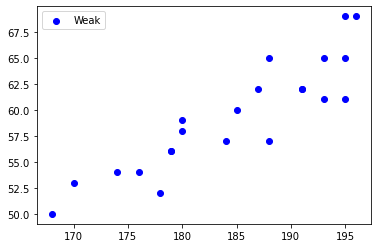

In [10]:
plt.scatter(scatter_data['Height'], scatter_data['Weight'], 
            color='blue', label='Weak')
plt.legend()
plt.show()

## Overweight 그래프 그리기

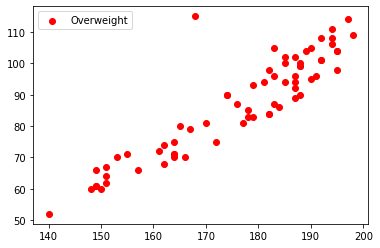

In [12]:
scatter_data=bmi[bmi['Label']=='Overweight']
plt.scatter(scatter_data['Height'], scatter_data['Weight'], 
            color='red', label='Overweight')
plt.legend()
plt.show()

## 전체 그래프 그리기

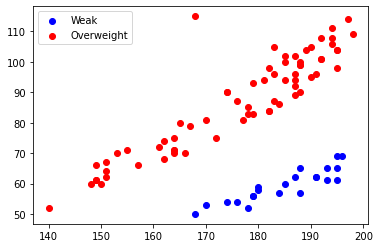

In [13]:
scatter_data = bmi[ bmi['Label'] == 'Weak' ]
plt.scatter( scatter_data['Height'] , scatter_data['Weight'] , color = 'blue',
           label = 'Weak')
plt.legend()

scatter_data = bmi[ bmi['Label'] == 'Overweight' ]
plt.scatter( scatter_data['Height'] , scatter_data['Weight'] , color = 'red',
           label = 'Overweight')
plt.legend()
plt.show()

### 반복되는 부분 함수로 만들기

In [14]:
 def myScatter(label, color):
    scatter_data = bmi[ bmi['Label'] == label ]
    plt.scatter( scatter_data['Height'] , scatter_data['Weight'] , 
                color = color, label = label)
    plt.legend()

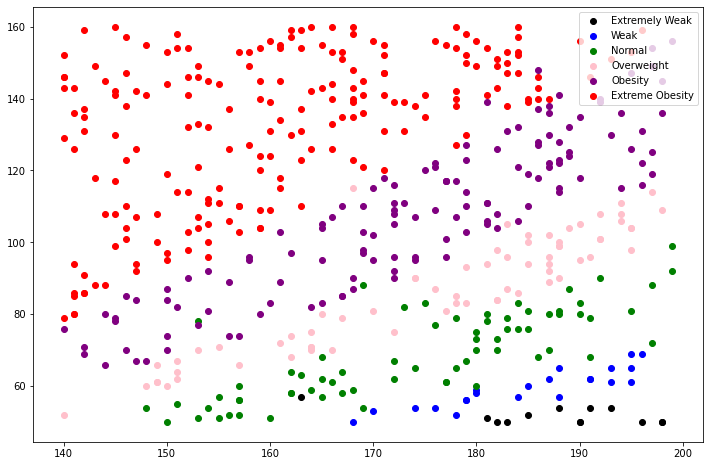

In [16]:
plt.figure(figsize=(12,8))
myScatter('Extremely Weak','black')
myScatter('Weak','blue')
myScatter('Normal','green')
myScatter('Overweight','pink')
myScatter('Obesity','purple')
myScatter('Extreme Obesity','red')
plt.show()